# LSTM

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/abhaymathur21/Cyber-Cypher-3.0/main/data/orders.csv")

In [3]:
df

,InvoiceNo,Product,Quantity,InvoiceDate,CustomerID
0,536365,1,6,2022-12-01 00:00:00,17850
1,536365,2,6,2022-12-01 00:00:00,17850
2,536365,3,8,2022-12-01 00:00:00,17850
3,536365,4,6,2022-12-01 00:00:00,17850
4,536365,5,6,2022-12-01 00:00:00,17850
...,...,...,...,...,...
541904,581587,2019,12,2023-12-09 00:00:00,12680
541905,581587,418,6,2023-12-09 00:00:00,12680
541906,581587,3213,4,2023-12-09 00:00:00,12680
541907,581587,3219,4,2023-12-09 00:00:00,12680


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df['Quantity'] = df['Quantity'].abs()
# Preprocess the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

In [5]:
df

,InvoiceNo,Product,Quantity,InvoiceDate,CustomerID,Month
0,536365,1,6,2022-12-01,17850,12
1,536365,2,6,2022-12-01,17850,12
2,536365,3,8,2022-12-01,17850,12
3,536365,4,6,2022-12-01,17850,12
4,536365,5,6,2022-12-01,17850,12
...,...,...,...,...,...,...
541904,581587,2019,12,2023-12-09,12680,12
541905,581587,418,6,2023-12-09,12680,12
541906,581587,3213,4,2023-12-09,12680,12
541907,581587,3219,4,2023-12-09,12680,12


In [6]:
df_grouped2 =df.groupby(['Month']).agg({'Quantity': 'sum'}).reset_index()
df_grouped2

,Month,Quantity
0,1,486466
1,2,295401
2,3,418028
3,4,335254
4,5,418459
5,6,447051
6,7,423962
7,8,443833
8,9,601015
9,10,686958


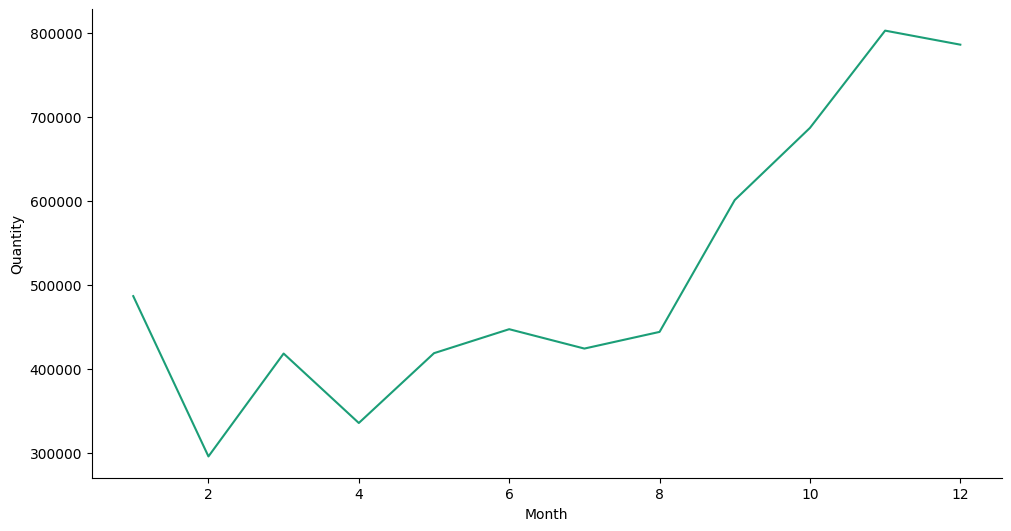

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Quantity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_grouped2.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Quantity')

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df['Quantity'] = df['Quantity'].abs()
# Preprocess the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
# Pivot the table to have products as columns, months as rows, and Quantity as values
df_pivot = df.pivot_table(index=['Product', 'Month'], values='Quantity', aggfunc='sum').reset_index()

# # Normalize the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# df_normalized = pd.DataFrame(scaler.fit_transform(df_pivot[['Product', 'Month', 'Quantity']]), columns=['Product', 'Month', 'Quantity'])

# Prepare data for LSTM
sequence_length = 2  # Choose an appropriate sequence length
X, y = [], []

for i in range(len(df_pivot) - sequence_length):
    X.append(df_pivot.iloc[i:i + sequence_length][['Product', 'Month']].values)
    y.append(df_pivot.iloc[i + sequence_length]['Quantity'])

# X, y = np.array(X), np.array(y)
X,y = df_pivot[['Product', 'Month']].values, df_pivot['Quantity'].values
X = X.reshape((-1,1,2))
y = np.log10(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1,2)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Epoch 1/50
812/812 [==============================] - 5s 3ms/step - loss: 0.7381 - val_loss: 0.8517
Epoch 2/50
812/812 [==============================] - 2s 2ms/step - loss: 0.7099 - val_loss: 0.6515
Epoch 3/50
812/812 [==============================] - 6s 8ms/step - loss: 0.7314 - val_loss: 0.7170
Epoch 4/50
812/812 [==============================] - 11s 14ms/step - loss: 0.6959 - val_loss: 0.6611
Epoch 5/50
812/812 [==============================] - 8s 10ms/step - loss: 0.8559 - val_loss: 0.6755
Epoch 6/50
812/812 [==============================] - 7s 9ms/step - loss: 0.7019 - val_loss: 0.6685
Epoch 7/50
812/812 [==============================] - 6s 8ms/step - loss: 0.7009 - val_loss: 0.8684
Epoch 8/50
812/812 [==============================] - 6s 8ms/step - loss: 0.6984 - val_loss: 0.6963
Epoch 9/50
812/812 [==============================] - 5s 7ms/step - loss: 0.7036 - val_loss: 0.9307
Epoch 10/50
812/812 [==============================] - 2s 3ms/step - loss: 0.6877 - val_loss: 0.6

In [9]:
X.shape

(32466, 1, 2)

In [10]:
df_pivot

,Product,Month,Quantity
0,1,1,5552
1,1,2,1880
2,1,3,2016
3,1,4,5779
4,1,5,4051
...,...,...,...
32461,4220,12,355
32462,4221,12,424
32463,4222,12,1050
32464,4223,12,61


In [11]:
model.save('lstm_model.keras')

In [24]:
i_values = np.arange(1, 4225)
j_values = np.arange(1, 13)

# Initialize an empty list to store the combinations
input_sequences = []

# Generate all combinations of i and j
for i in i_values:
    for j in j_values:
        input_sequences.append([i, j])

# Convert the list to a NumPy array
input_sequence = np.array(input_sequences)
# print(input_sequence)

# input_sequence = np.array([[1, 1], [1,2], [1,3]])  # Product = 1, Month = 1

# input_sequence_normalized = scaler.transform(input_sequence)

# Reshape the input sequence to match the model's input shape
input_sequence_reshaped = input_sequence.reshape(-1, 1, 2)

# Make the prediction
predicted_quantity_normalized = model.predict(input_sequence_reshaped)

final_predictions = 10**(predicted_quantity_normalized)

# Inverse transform to get the predicted quantity in the original scale
# predicted_quantity_original_scale = scaler.inverse_transform(np.array([[predicted_quantity_normalized[0, 0], 0]]))[0, 0]

print(f'Predicted Quantity: {final_predictions}')


1584/1584 [==============================] - 3s 2ms/step
Predicted Quantity: [[3332.4214  ]
 [3623.3052  ]
 [3260.7507  ]
 ...
 [  25.985369]
 [  25.985369]
 [  25.985369]]


In [25]:
import numpy as np
import pandas as pd

# Number of products and batch size
num_products = 4224
months = 12

# Initialize a list to store data for DataFrame creation
data = []

# Assign predictions to rows for each product
for i in range(num_products):
    product_id = i + 1  # Assuming product IDs start from 1
    predictions_row = final_predictions[i * months: (i + 1) * months].flatten()

    # Append to the data list
    data.append([product_id] + predictions_row.tolist())

# Create a DataFrame
columns = ['Product_ID'] + [f'Month_{j}' for j in range(1, months + 1)]
df_predictions = pd.DataFrame(data, columns=columns)

# Now df_predictions contains the product IDs and their corresponding predictions for each month.


In [26]:
df_predictions

,Product_ID,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,3332.421387,3623.305176,3260.750732,2612.702393,2016.449585,1579.021729,1298.377319,1143.871582,1089.579956,1122.403931,1244.019409,1471.699951
1,2,263.396759,195.222229,164.586395,140.752808,124.800598,116.608131,115.736122,122.280586,137.220642,162.707001,202.468689,262.468048
2,3,129.954620,79.633186,59.066319,55.528252,57.156204,61.991707,70.724075,84.777939,106.123932,138.005051,185.403381,255.894821
3,4,91.659760,56.620045,41.486980,38.815697,41.596779,48.059635,58.962887,75.263023,99.333412,134.982925,188.030823,267.494720
4,5,80.388657,51.384838,38.636520,33.488876,37.264599,44.445423,55.703350,72.843155,98.732925,137.481689,195.477997,282.770691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,4220,25.985361,25.985361,25.985361,25.985361,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369
4220,4221,25.985361,25.985361,25.985361,25.985361,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369
4221,4222,25.985361,25.985361,25.985361,25.985361,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369
4222,4223,25.985361,25.985361,25.985361,25.985361,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369,25.985369


In [ ]:
df_predictions.to_json('predictions.json', orient='records')